In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Linear Model is of the form Y=m1*['Microbes']+m2*['Sucrose']+c 
Y- Predicted Biosurfactant conc.
, m1,m2- slopes
, c- intercept

## Loading the dataset

In [2]:
df=pd.read_csv(r'C:\Users\medik\OneDrive\Desktop\CSV Files\Data .csv')
df

,Microbes,Sucrose,Biosurfactant
0,0.152167,19.234000,0.031720
1,0.288303,17.867667,0.050135
2,0.460620,16.421433,0.065525
3,0.655827,14.899000,0.108600
4,0.977037,12.830467,0.231010
5,1.359320,11.563667,0.386350
6,1.531317,10.347333,0.515205
7,1.839917,9.145300,0.648945
8,2.174953,7.523667,0.838135
9,2.560059,6.550633,0.940925


## Plots between Sucrose/Biosurfactant & Microbes/Biosurfactant

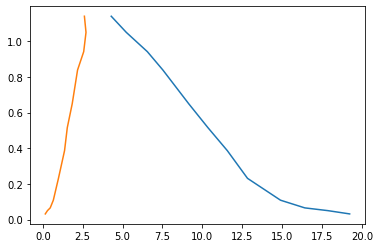

In [219]:
plt.plot(df[['Sucrose']],df['Biosurfactant'])
plt.plot(df[['Microbes']],df['Biosurfactant'])
plt.show()

# Converting the values to arrays

In [62]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,2:3].values

array([[0.03172  ],
       [0.0501345],
       [0.065525 ],
       [0.1086   ],
       [0.23101  ],
       [0.38635  ],
       [0.515205 ],
       [0.648945 ],
       [0.838135 ],
       [0.940925 ],
       [1.04911  ],
       [1.139435 ]])

## Splitting the data into training and testing dataset

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

## Building the Linear Regression Moodel

In [25]:
from sklearn.linear_model import LinearRegression
LG=LinearRegression()
LG.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions for the input testing data

In [26]:
LG.predict(X_test)

array([[0.48506862],
       [0.89328319],
       [0.24035364],
       [1.01031678],
       [0.07914634]])

## Actual/Predicted values

In [200]:
print('Actual Values: ',Y_test,'\n')
print('Predicted values: ',LG.predict(X_test))


Actual Values:  [[0.515205]
 [1.139435]
 [0.23101 ]
 [1.04911 ]
 [0.065525]] 

Predicted values:  [[0.48506862]
 [0.89328319]
 [0.24035364]
 [1.01031678]
 [0.07914634]]


array([[ 1.53131667, 10.34733333],
       [ 2.60435333,  4.28683333],
       [ 0.97703667, 12.83046667],
       [ 2.704572  ,  5.23      ],
       [ 0.46062   , 16.42143333]])

## Coefficients

In [64]:
LG.coef_ 
#slopes m1,m2

array([[0.67573038, 0.05228429]])

## Intercept

In [72]:
LG.intercept_
#intercept

array([-1.09069149])

## Accuracy of the model

In [29]:
LG.score(X_train,Y_train)

0.9894737299220857

## Conclusion: The linear model is of the form:
        Y_Pred = 0.67573038*[Microbes Conc.] + 0.05228429*[Sucrose Conc.] - 1.09069149

In [214]:
pred_bio=LG.predict([[0.152167,19.234],[0.288303,17.867667],
            [0.46062,16.421433],[0.655827,14.899],
            [0.977037,12.830467],[1.35932,11.563667],
            [1.531317,10.347333],[1.839917,9.1453],
            [2.174953,7.523667],[2.560059,6.550633],
            [2.704572,5.23],[2.604353,4.286833]])

time=[0,12,24,36,48,60,72,84,96,108,120,132]

## Plots: Time (hrs) vs Biosurfactant (g/l)

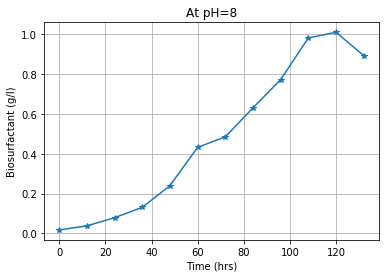

In [221]:
plt.plot(time,pred_bio,marker='*')
plt.xlabel('Time (hrs)')
plt.ylabel('Biosurfactant (g/l)')
plt.grid()
plt.title('At pH=8')
plt.show()